In [20]:
import matplotlib.pyplot as plt

In [18]:
import pandas as pd

# Lecture par morceaux de 1000 lignes
df = pd.read_csv("/Users/guillaumeramirez/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logETL/LogETLError_20250130.csv", sep=";")

df.head()

/var/folders/f4/k8l34hms3tj0bm4tlr3mwg080000gn/T/ipykernel_69187/3750721302.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/guillaumeramirez/OneDrive - CentraleSupelec/Smart ETL - DOR/data/logETL/LogETLError_20250130.csv", sep=";")


,Server version,Client version,Product,Project name,Model,Date,Time,Row number,Type,Message,ETL_StartDateTime,Launcher_Id,Launcher_Name,Machine,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.3,6.0.3,MyReport Server BE,MySystem BE,Excel MyReport/Affectation salarié/Affectation...,2025-01-28,23:35:01.8626871,0,Erreur,Un incident est survenu L'instruction CREATE U...,2025-01-28 23:35:01,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2025-01-28 23:34:51
1,6.0.3,6.0.3,MyReport Server BE,MySystem BE,Excel MyReport/Affectation salarié/Affectation...,2025-01-28,23:35:01.8771199,0,Erreur,Un incident est survenu L'instruction CREATE U...,2025-01-28 23:35:01,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2025-01-28 23:34:51
2,6.0.3,6.0.3,MyReport Server BE,MySystem BE,Excel MyReport/Commerce/PrimForce/PROJETS/Prim...,2025-01-29,0:08:18.4659536,49,Problème,"La taille du champ Commentaires"" (149) est tro...",2025-01-28 23:35:01,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2025-01-28 23:34:51
3,6.0.3,6.0.3,MyReport Server BE,MySystem BE,Excel MyReport/Commerce/PrimForce/PROJETS/Prim...,2025-01-29,0:08:18.4679794,50,Problème,"La taille du champ Commentaires"" (149) est tro...",2025-01-28 23:35:01,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2025-01-28 23:34:51
4,6.0.3,6.0.3,MyReport Server BE,MySystem BE,Excel MyReport/Commerce/PrimForce/PROJETS/Prim...,2025-01-29,0:08:28.0651491,2,Erreur,Problème rencontré sur le champ Probabilité de...,2025-01-28 23:35:01,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2025-01-28 23:34:51


In [14]:
print(df.shape)

(9392681, 19)


In [15]:
print(df.tail(10))

        Server version Client version             Product Project name  \
9392671        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392672        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392673        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392674        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392675        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392676        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392677        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392678        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392679        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   
9392680        6.1.0.2        6.1.0.2  MyReport Server BE  MySystem BE   

                                                     Model        Date  \
9392671       DW/IntermédiaireMyPrimever/TMS/ConsoTournées  2025-01-30   
9392672       DW/IntermédiaireMyPrime

In [16]:
df['Date']=pd.to_datetime(df['Date'])

In [17]:
min_date = df["Date"].min()
max_date = df["Date"].max()

print("Date la plus ancienne :", min_date)
print("Date la plus récente :", max_date)

Date la plus ancienne : 2025-01-28 00:00:00
Date la plus récente : 2025-01-30 00:00:00


In [19]:
df['Message'].nunique()

598859

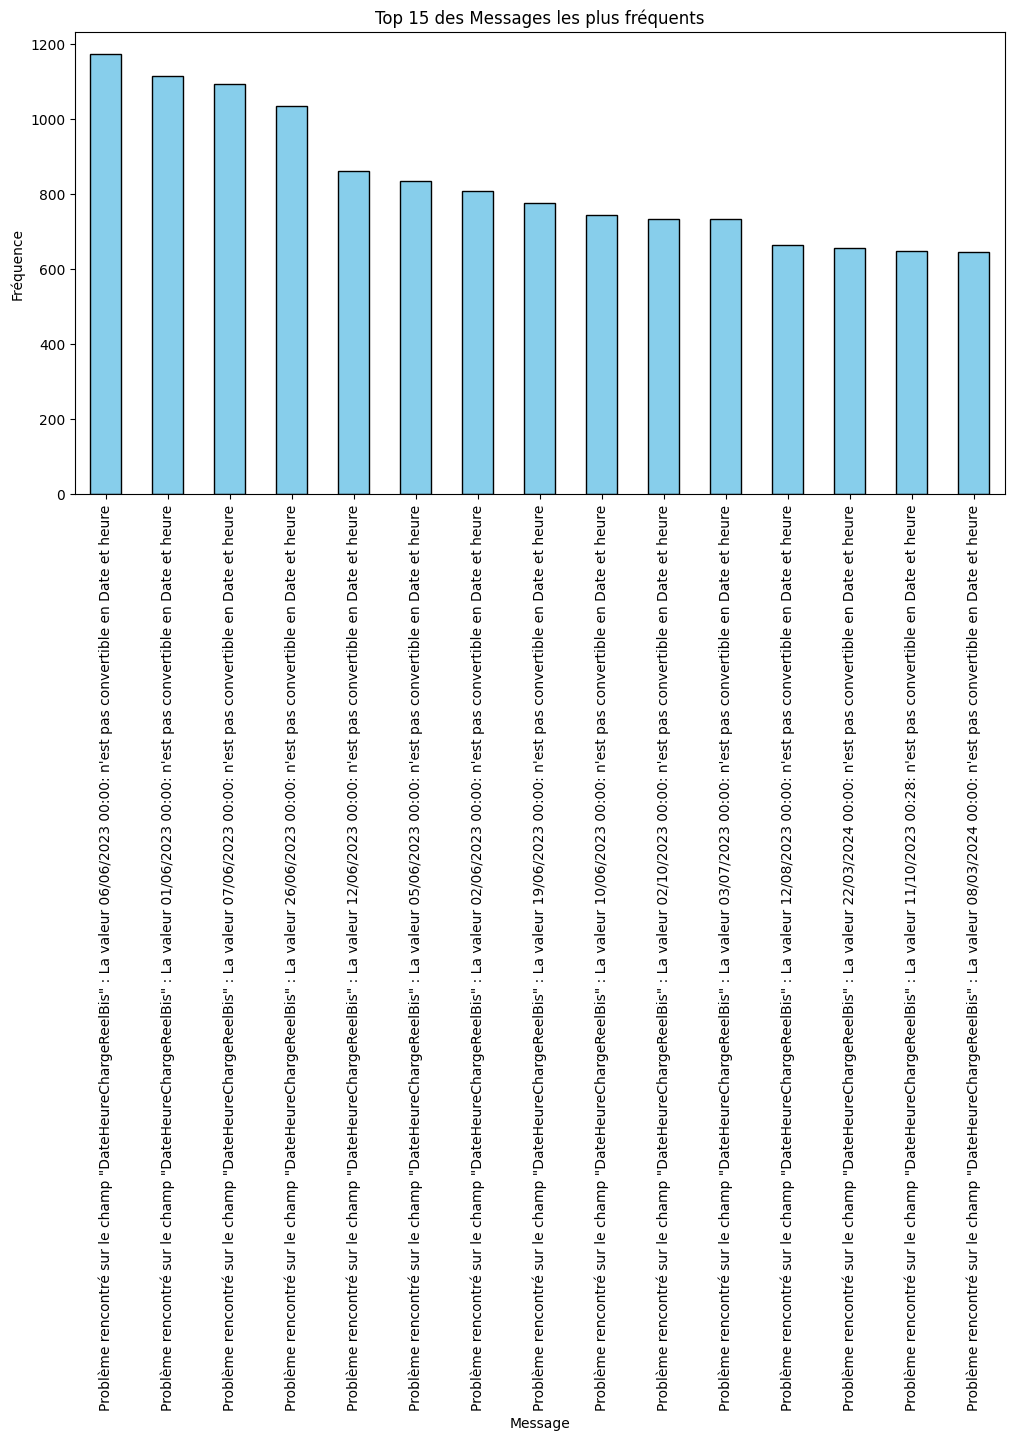

In [21]:
# Compter les occurrences des DashboardId
df_message = df['Message'].value_counts()

# Sélectionner les 15 plus fréquents
df_message = df_message.head(15)

plt.figure(figsize=(12, 6))
df_message.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Message")
plt.ylabel("Fréquence")
plt.title("Top 15 des Messages les plus fréquents")
plt.show()